<a href="https://colab.research.google.com/github/Upkar1/House-Sales-Data-Analysis/blob/master/House%20Sales%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from google.colab import files

In [0]:
uploaded=files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [0]:
df=pd.read_csv("kc_house_data.csv")

#House Sales Report

##Introduction to the dataset


**This dataset being used here is regarding the sales of houses in King County**. King County is a county located in the U.S. state of Washington. The population was 2,233,163 in the 2018 census estimate. King is the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, which is the state's largest city.

 This dataset includes the homes sold between May 2014 and May 2015.

##A General Overview of Dataset

In [0]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df.shape

(21613, 21)

So, as we can see above, the dataset has 21613 rows and 21 columns.

Datset has the following columns:-

1. **id**- a notation for a house
2. **date**- Date house was sold
3. **price**- Price is prediction target
4. **bedrooms**- Number of Bedrooms/House
5. **bathrooms**- Number of bathrooms/House
6. **sqft_living**- square footage of the home
7. **sqft_lot**- square footage of the lot
8. **floors**- Total floors (levels) in house
9. **waterfront**- House which has a view to a waterfront
10. **view** - Has been viewed
11. **condition**- How good the condition is ( Overall )
12. **grade**- overall grade given to the housing unit, based on King County grading system
13. **sqft_above**- square footage of house apart from basement
14. **sqft_basement**- square footage of the basement
15. **yr_built**- Built Year
16. **yr_renovated**- Year when house was renovated
17. **zipcode**- zip
18. **lat**- Latitude coordinate
19. **long**- Longitude coordinate
20. **sqft_living15**- Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. **sqft_lot15**- lotSize area in 2015(implies-- some renovations)
,

#Knowing a few Stats about the Data



In [0]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The above stats tell us a lot about the dataset. As we can see, the maximum no. of bedrooms here is 33, maximum bathrooms is 8, the largest square_feet house has an area of 13540 sqft, maximum floors are 3.5, max views to any house is 4 and many more things.

Also we note that on an average, a house has around 3 bedrooms,  2 bathrooms,  sqft_living is around 2079, has 1.5 floors, doesn't have a waterfront view, grade is around 8 and several other things that we notice.

There's this one house that has 33 bedrooms while the mean for bedrooms in that area is around 3,
so it might be the largest house with the largest sqft_living area - but that's a guess for now. We will be surely check out on this point as we move ahead.

**Columns like id, lat, long and zipcode can be dropped off as they would not be making any differnce in the analysis of the data.**

So, now we have this:-

In [0]:
df1=df.drop(['id','lat','long','zipcode'],axis=1)
df1.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,2390,7570


It would be good to see if we have any null values in our dataset.

In [0]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

As seen above, there isn't a single null value in the dataset. Looks good.

#Univariate Analysis

We will be identifying the distribution of data and check for the anomalies that exist in the dataset.
So, let's start with it..

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

**Analysing the Data**

We should be checking the distribution of bedrooms for it is an important factor when someone buys a house.


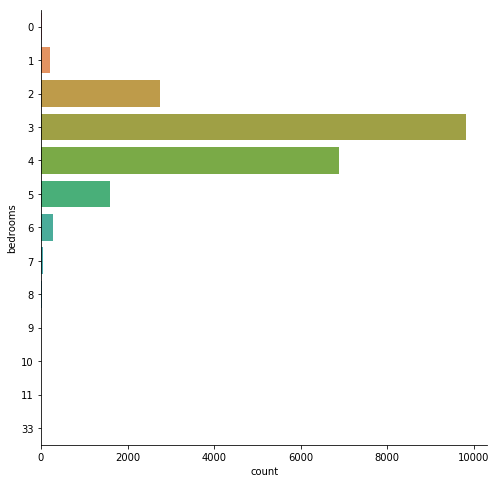

In [0]:
plt.subplots(figsize=(8,8))
sns.countplot(data=df,y='bedrooms')
sns.despine()

In [0]:
df['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

As we see , the house with the most no. of bedrooms should have the largest sqft area. O let's check to see if it's true.

In [0]:
df.query('bedrooms==33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


We notice that the house has 33 bedrooms but the sqft area covered by it 1620, and it is quite not  possible to have 33 bedrooms house in that sqft area.

Lets find out the house with the largest area i.e. 13450 sqft ...

In [0]:
df.query('sqft_living==13540')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


So we see that the house with the largest sqft_area has 7 bedrooms atmost. So it's quite not possible for a house built up in an area of 1620 sqft to have 33 bedrooms. Although that piece of information look wrong and we might think of removing this, we have to notice that the rest of the values like no. of bathrooms, sqft_living ,floors etc seem to be quite valid. So, most probably, it can be a error in the no. of bedrooms only that occured somehow and by looking at the value, we can say that the no. of bedrooms for this house was 3 and was wrongly entered as 33. We can correct that  particular part instead of deleting it. Here we go...

In [0]:
df['bedrooms_corrected']=df['bedrooms'].replace(33,3)
df.query('id==2402100895')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_corrected
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,3


As we can see, column bedroom_corrected has the corrected value for the bedroom no. for this house. Now we will see a notable amount of change in our stats as well. Let's see...


In [0]:
df['bedrooms_corrected'].describe()

count    21613.000000
mean         3.369454
std          0.907964
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms_corrected, dtype: float64

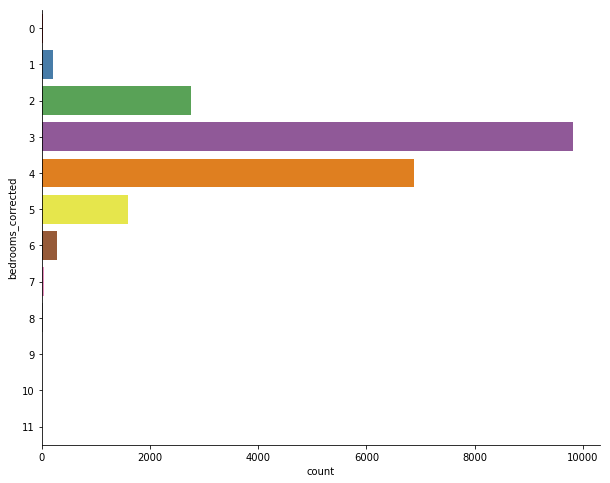

In [0]:
plt.subplots(figsize=(10,8))
sns.countplot(data=df,y='bedrooms_corrected',palette='Set1')
sns.despine()

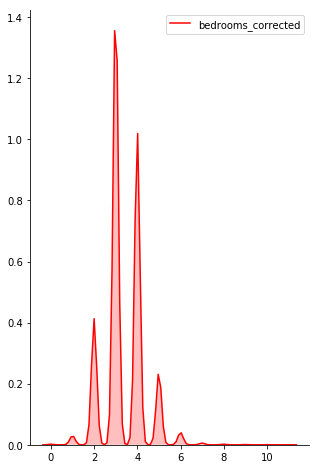

In [0]:
plt.subplots(figsize=(5,8))
sns.kdeplot(df['bedrooms_corrected'],color='red',shade=True)
sns.despine()

The maximum number of bedrooms in a house comes down to 11. Let check other attrubutes as well to see any kind of anomalies. 


Let's check the values for **bathrooms**...

In [0]:
df['bathrooms'].describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [0]:
df['bathrooms'].head(10)

0    1.00
1    2.25
2    1.00
3    3.00
4    2.00
5    4.50
6    2.25
7    1.50
8    1.00
9    2.50
Name: bathrooms, dtype: float64

We notice the values for the bathroom is in float (for example - 0.75), and it might seem to be wrong.
But actually, it's not...

Read this-

**In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower  and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". This lack of a single, universal definition commonly results in discrepancies between advertised and actual number of baths in real estate listings. An additional complication is that there are currently two ways of notating the number of bathrooms in a dwelling. One method is to count a half bathroom as ".5" and then add this to the number of full bathrooms (e.g., "2.5" baths would mean 2 full baths and 1 half bath). The other, newer method is to put the number of full bathrooms to the left side of the decimal point and to put the number of half bathrooms to the right of the decimal point (e.g., "2.1" would mean 2 full baths and 1 half bath; "3.2" would mean 3 full baths and 2 half baths).**

So we understand why the values are like that.

Now, let's check the distribution....

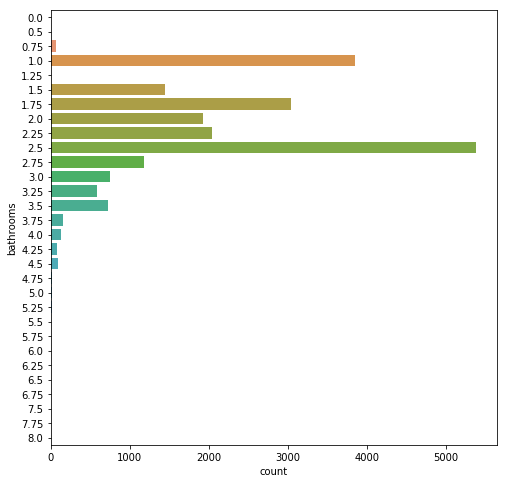

In [0]:
plt.subplots(figsize=(8,8))
sns.countplot(data=df,y='bathrooms')
plt.show()

In [0]:
df['bathrooms'].describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

Everything seems fine with it.

Let's check for the **sqft_living**...

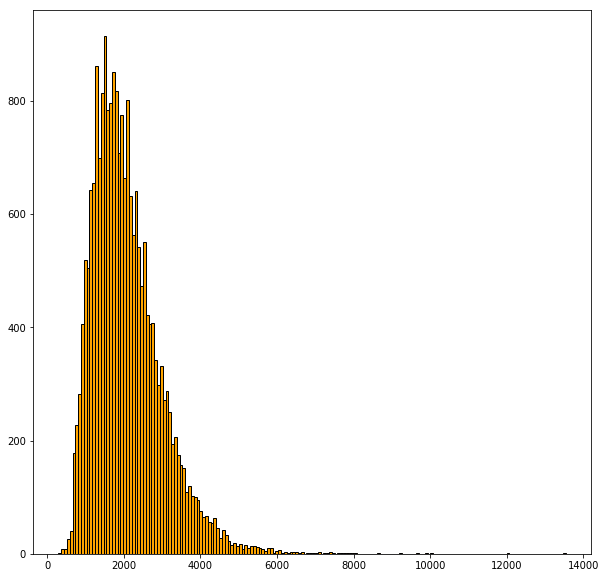

In [0]:
plt.subplots(figsize=(10,10))
plt.hist(df['sqft_living'], bins = 180,color = 'orange', edgecolor = 'black')
plt.show()

In [0]:
df['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

Sqft_living goes somewhere near 14000, and by seeing the description we find that the max sqft_living is 13540. While the most of the houses have an sqft_living area between 1500 to 2500 sqft. Looks good.

For **Houses with waterfronts** we have:-

In [0]:
df['waterfront'].describe()

count    21613.000000
mean         0.007542
std          0.086517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

So, as we can figure out, there's only one house with a waterfront.

Let's check out for the **grade** as it is an important factor.

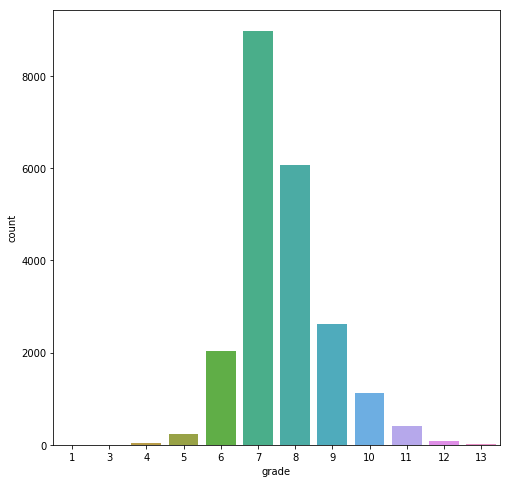

In [0]:
plt.subplots(figsize=(8,8))
sns.countplot(data=df,x='grade')
plt.show()

In [0]:
df['grade'].describe()

count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

Most of the houses have a grade between 7-8 while the maximum recieved is 13. Looks fine.

#Correlation between Variables

It will be good to see how the variables are correalted before we jump to bivariate analysis as it will surely help us in further process.

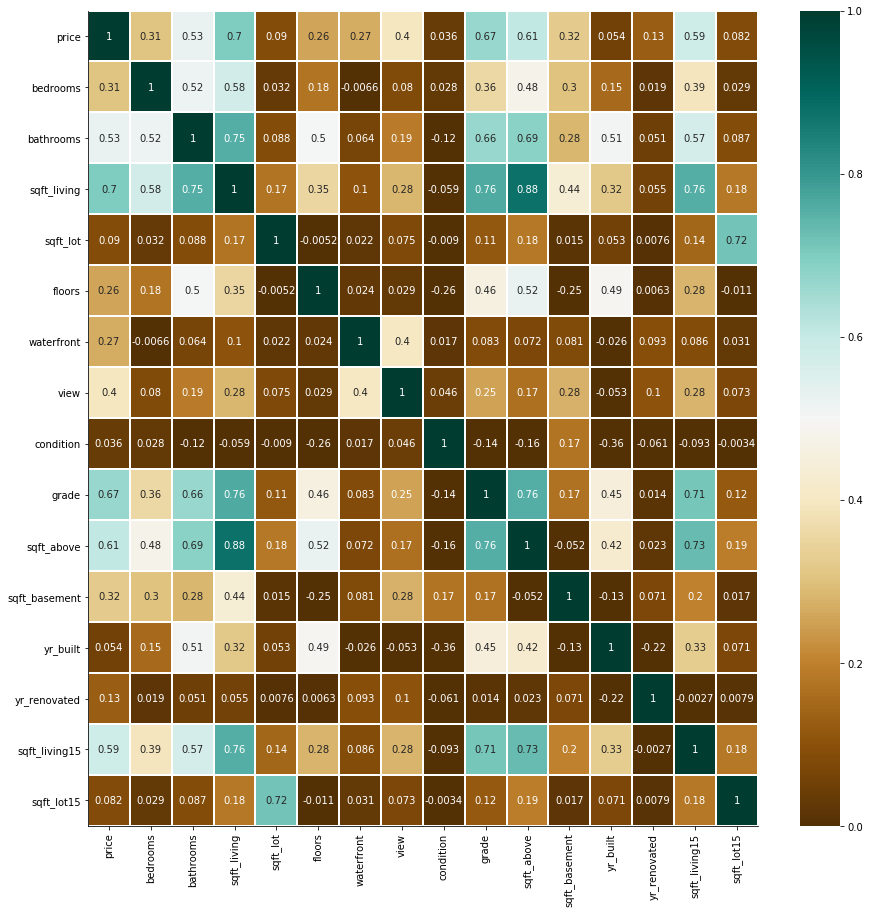

In [0]:
plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(), vmin=0, vmax=1,annot=True, cmap='BrBG', linewidth=1)
sns.despine()

So we see there is a strong correlation between these pairs:-


*   sqft_living - grade
*   sqft_living - price
*   grade - price
*   price - sqft_living15


#Bivariate Analysis

We will be taking the above pairs to do bivariate analysis

So, let's start.....


###sqft_living - grade



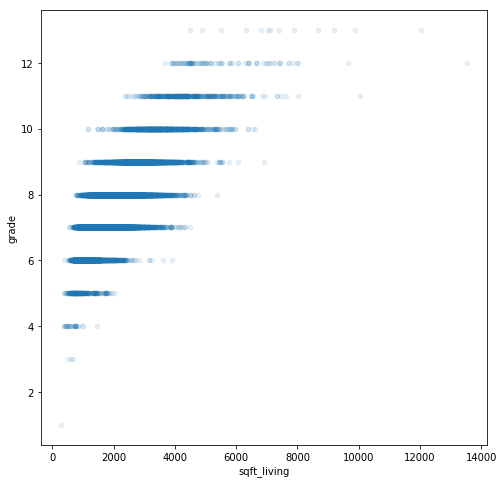

In [0]:
df.plot.scatter(x='sqft_living',y='grade',alpha=0.1,figsize=(8,8))

In [0]:
df[['sqft_living','grade']].describe()

,sqft_living,grade
count,21613.000000,21613.000000
mean,2079.899736,7.656873
std,918.440897,1.175459
min,290.000000,1.000000
25%,1427.000000,7.000000
50%,1910.000000,7.000000
75%,2550.000000,8.000000
max,13540.000000,13.000000


We see that there's a increase in grade as the sqft_living increases. This shows a positive relation between the sqft_living and grade.

###sqft_living - price

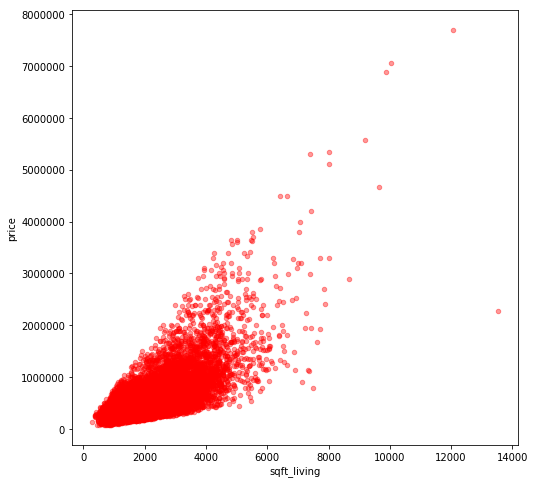

In [0]:
df.plot.scatter(x='sqft_living',y='price',color='red',figsize=(8,8),alpha=0.4)

In [0]:
df[['sqft_living','price']].describe()

,sqft_living,price
count,21613.000000,2.161300e+04
mean,2079.899736,5.400881e+05
std,918.440897,3.671272e+05
min,290.000000,7.500000e+04
25%,1427.000000,3.219500e+05
50%,1910.000000,4.500000e+05
75%,2550.000000,6.450000e+05
max,13540.000000,7.700000e+06


As obvoius, the graph shows that the price of the property tends to increase as the sqft_living increases.

###grade - price

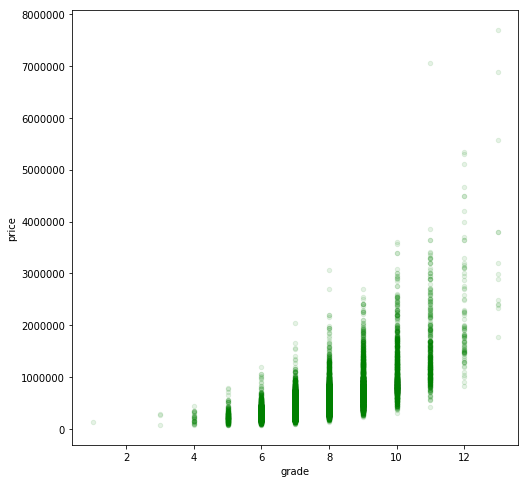

In [0]:
df.plot.scatter(x='grade',y='price',color='green',animated=True,figsize=(8,8),alpha=0.1)

In [0]:
df[['grade','price']].describe()

,grade,price
count,21613.000000,2.161300e+04
mean,7.656873,5.400881e+05
std,1.175459,3.671272e+05
min,1.000000,7.500000e+04
25%,7.000000,3.219500e+05
50%,7.000000,4.500000e+05
75%,8.000000,6.450000e+05
max,13.000000,7.700000e+06


We notice that as the grade for the certain house goes up, price shows a positive growth as well.
Hence higher the grade, more will be the price.

###price - sqft_living15

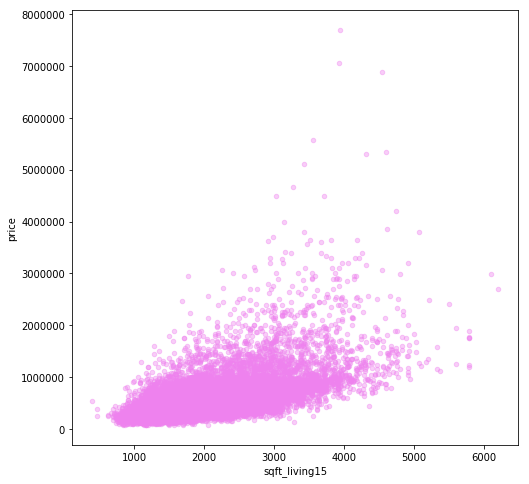

In [0]:
df.plot.scatter(x='sqft_living15',y='price',color='violet',animated=True,alpha=0.4,figsize=(8,8))

In [0]:
df[['sqft_living15','price']].describe()

,sqft_living15,price
count,21613.000000,2.161300e+04
mean,1986.552492,5.400881e+05
std,685.391304,3.671272e+05
min,399.000000,7.500000e+04
25%,1490.000000,3.219500e+05
50%,1840.000000,4.500000e+05
75%,2360.000000,6.450000e+05
max,6210.000000,7.700000e+06


As the living area of the properties increase, prices go up with almost the same rate which is obvious. 

Apart from these let's consider **no.of bathrooms-price** and **no. of bedrooms-price**
Here we go...

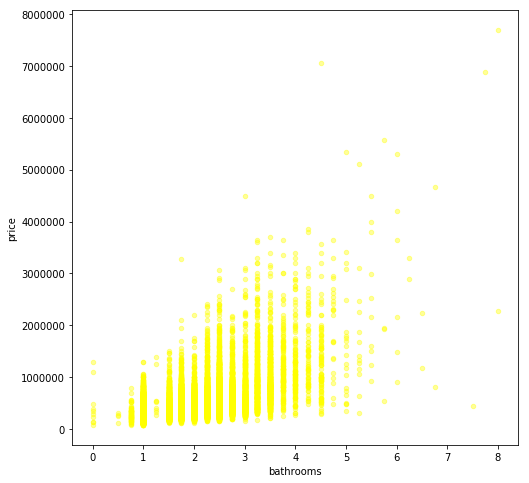

In [0]:
df.plot.scatter(x='bathrooms',y='price',color='yellow',animated=True,figsize=(8,8),alpha=0.4)

In [0]:
df[['bathrooms','price']].describe()

,bathrooms,price
count,21613.000000,2.161300e+04
mean,2.114757,5.400881e+05
std,0.770163,3.671272e+05
min,0.000000,7.500000e+04
25%,1.750000,3.219500e+05
50%,2.250000,4.500000e+05
75%,2.500000,6.450000e+05
max,8.000000,7.700000e+06


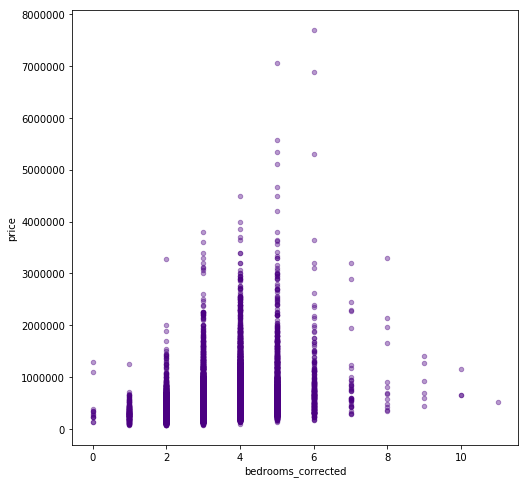

In [0]:
df.plot.scatter(x='bedrooms_corrected',y='price',color='indigo',animated=True,figsize=(8,8),alpha=0.4)

In [0]:
df[['bedrooms_corrected','price']].describe()

,bedrooms_corrected,price
count,21613.000000,2.161300e+04
mean,3.369454,5.400881e+05
std,0.907964,3.671272e+05
min,0.000000,7.500000e+04
25%,3.000000,3.219500e+05
50%,3.000000,4.500000e+05
75%,4.000000,6.450000e+05
max,11.000000,7.700000e+06


As we see in the above plots , the price for a property increases if it has more no. of bathrooms, while the prices first tend to increase for more no. of bedrooms and then decrease. Looks like people are willing to pay more for the houses with up to 6-7 bedrooms, but are quite not intrested in buying larger houses.

#Conclusion

We can say that the important factors that effect the sales of the properties in the King County area are **sqft_living15, grade, price, no. of bathrooms and bedrooms** . Although other factors have some effect on the sales, these are the most dominant ones and might be the deciding factor whether or not a person is going to buy a house.